# STANDALONE STUDY
## **STEWART GOUGH PLATFORM**
-----------------------------

### SYSTEM DISCRIPTION
----------------------

*Discription here* 

---------------------------

### **NOTE**
#### **Adding package path to system path and creating needed directories.**
The current ```pkg_path``` variable is where I have the repository on my machine. You should change it to where you cloned the repository on your machine.

-----------------------------------------------

In [1]:
pkg_path = '/home/khaledghobashy/Documents/smbd'

In [2]:
import sys
sys.path.append(pkg_path)

In [3]:
import os

def create_project_dirs():
    dirs = os.listdir()
    for d in ['csv_files', 'results']:
        if d not in dirs:
            os.mkdir(d)
            print('Created Directory %s'%d)
    if '__init__.py' not in dirs:
        with open('__init__.py', 'w') as file:
            file.write('#')
        print('Created __init__.py file')
    

In [4]:
create_project_dirs()

## SYMBOLIC TOPOLOGY

In [5]:
from smbd.interfaces.scripting import standalone_topology

In [6]:
sym_model = standalone_topology('stewart_gough')

### ADDING BODIES

In [7]:
sym_model.add_body('table')

sym_model.add_body('link_1')
sym_model.add_body('link_2')
sym_model.add_body('link_3')

sym_model.add_body('rocker_1')
sym_model.add_body('rocker_2')
sym_model.add_body('rocker_3')


### ADDING JOINTS

In [8]:
sym_model.add_joint.revolute('rev_1', 'ground', 'rbs_rocker_1')
sym_model.add_joint.revolute('rev_2', 'ground', 'rbs_rocker_2')
sym_model.add_joint.revolute('rev_3', 'ground', 'rbs_rocker_3')

sym_model.add_joint.spherical('bottom_sph_1', 'rbs_rocker_1', 'rbs_link_1')
sym_model.add_joint.spherical('bottom_sph_2', 'rbs_rocker_2', 'rbs_link_2')
sym_model.add_joint.spherical('bottom_sph_3', 'rbs_rocker_3', 'rbs_link_3')

sym_model.add_joint.universal('upper_uni_1', 'rbs_link_1', 'rbs_table')
sym_model.add_joint.universal('upper_uni_2', 'rbs_link_2', 'rbs_table')
sym_model.add_joint.universal('upper_uni_3', 'rbs_link_3', 'rbs_table')

sym_model.add_joint.tripod('tripod', 'rbs_table', 'ground')

### ADDING ACTUATORS

In [9]:
sym_model.add_actuator.rotational_actuator('act_1', 'jcs_rev_1')
sym_model.add_actuator.rotational_actuator('act_2', 'jcs_rev_2')
sym_model.add_actuator.rotational_actuator('act_3', 'jcs_rev_3')


### ASSEMBLING

In [10]:
sym_model.assemble_model()

### SYMBOLIC CHARACTERISTICS 

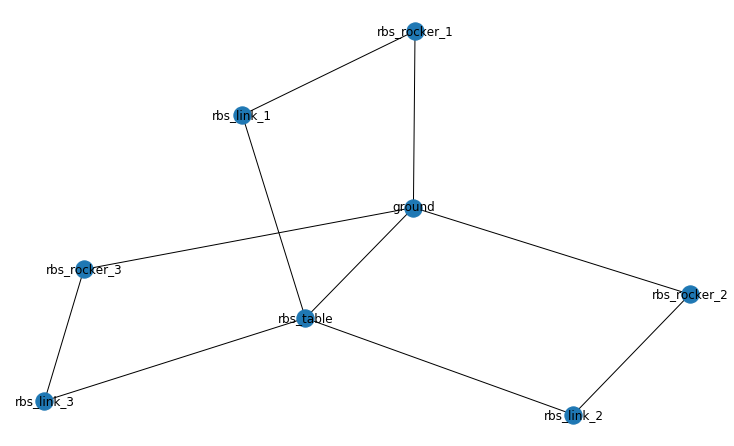

In [11]:
sym_model._mbs.draw_constraints_topology()

In [12]:
sym_model._mbs.pos_equations

Matrix([
[                                                                                                                               A({P_{ground}})*{\bar{u}^{ground}_{jcs_rev_1}} - A({P_{rbs_rocker_1}})*{\bar{u}^{rbs_rocker_1}_{jcs_rev_1}} + {R_{ground}} - {R_{rbs_rocker_1}}],
[                                                                                                                                                               Mbar_ground_jcs_rev_1[:,(0, 1)].T*A({P_{ground}}).T*A({P_{rbs_rocker_1}})*Mbar_rbs_rocker_1_jcs_rev_1[:,(2, 3)]],
[                                                                                                                                                               Mbar_ground_jcs_rev_1[:,(1, 2)].T*A({P_{ground}}).T*A({P_{rbs_rocker_1}})*Mbar_rbs_rocker_1_jcs_rev_1[:,(2, 3)]],
[(-sin(UF_mcs_act_1(t)))*Mbar_ground_mcs_act_1[:,(0, 1)].T*A({P_{ground}}).T*A({P_{rbs_rocker_1}})*Mbar_rbs_rocker_1_mcs_act_1[:,(0, 1)] + cos(UF_mcs_act_1(t))*Mbar_grou

## SYMBOLIC CONFIGURATION

In [13]:
from smbd.interfaces.scripting import configuration

In [14]:
config_name = 'stewart_gough_cfg'
config = configuration(config_name, sym_model)

### CONFIGURATION INPUTS

In [15]:
config.add_point.UserInput('bottom_1')
config.add_point.UserInput('bottom_2')
config.add_point.UserInput('bottom_3')
config.add_point.UserInput('middle_1')
config.add_point.UserInput('middle_2')
config.add_point.UserInput('middle_3')
config.add_point.UserInput('upper_1')
config.add_point.UserInput('upper_2')
config.add_point.UserInput('upper_3')
config.add_point.UserInput('tripod')

config.add_vector.UserInput('y')
config.add_vector.UserInput('z')

### CONFIGURATION RELATIONS

In [16]:
# Bottom Revolute Joints:
config.add_relation.Equal_to('pt1_jcs_rev_1', ('hps_bottom_1',))
config.add_relation.Equal_to('ax1_jcs_rev_1', ('vcs_y',))

config.add_relation.Equal_to('pt1_jcs_rev_2', ('hps_bottom_2',))
config.add_relation.Equal_to('ax1_jcs_rev_2', ('vcs_y',))

config.add_relation.Equal_to('pt1_jcs_rev_3', ('hps_bottom_3',))
config.add_relation.Equal_to('ax1_jcs_rev_3', ('vcs_y',))

# Bottom Spherical Joints:
config.add_relation.Equal_to('pt1_jcs_bottom_sph_1', ('hps_middle_1',))
config.add_relation.Equal_to('ax1_jcs_bottom_sph_1', ('vcs_z',))

config.add_relation.Equal_to('pt1_jcs_bottom_sph_2', ('hps_middle_2',))
config.add_relation.Equal_to('ax1_jcs_bottom_sph_2', ('vcs_z',))

config.add_relation.Equal_to('pt1_jcs_bottom_sph_3', ('hps_middle_3',))
config.add_relation.Equal_to('ax1_jcs_bottom_sph_3', ('vcs_z',))

# Upper Universal Joints:
config.add_relation.Equal_to('pt1_jcs_upper_uni_1', ('hps_upper_1',))
config.add_relation.Oriented('ax1_jcs_upper_uni_1', ('hps_middle_1', 'hps_upper_1'))
config.add_relation.Equal_to('ax2_jcs_upper_uni_1', ('vcs_z',))

config.add_relation.Equal_to('pt1_jcs_upper_uni_2', ('hps_upper_2',))
config.add_relation.Oriented('ax1_jcs_upper_uni_2', ('hps_middle_2', 'hps_upper_2'))
config.add_relation.Equal_to('ax2_jcs_upper_uni_2', ('vcs_z',))

config.add_relation.Equal_to('pt1_jcs_upper_uni_3', ('hps_upper_3',))
config.add_relation.Oriented('ax1_jcs_upper_uni_3', ('hps_middle_3', 'hps_upper_3'))
config.add_relation.Equal_to('ax2_jcs_upper_uni_3', ('vcs_z',))

# Upper Tripod Joint:
config.add_relation.Equal_to('pt1_jcs_tripod', ('hps_tripod',))
config.add_relation.Equal_to('ax1_jcs_tripod', ('vcs_z',))

# Actuators Axis:
config.add_relation.Equal_to('ax1_mcs_act_1', ('ax1_jcs_rev_1',))
config.add_relation.Equal_to('ax1_mcs_act_2', ('ax1_jcs_rev_2',))
config.add_relation.Equal_to('ax1_mcs_act_3', ('ax1_jcs_rev_3',))


### GEOMETRIES

In [17]:
config.add_scalar.UserInput('links_ro')
config.add_scalar.UserInput('rockers_ro')

config.add_geometry.Triangular_Prism('table', ('hps_upper_1','hps_upper_2','hps_upper_3','s_rockers_ro'))
config.assign_geometry_to_body('rbs_table', 'gms_table')

config.add_geometry.Cylinder_Geometry('rocker_1', ('hps_bottom_1','hps_middle_1','s_rockers_ro'))
config.assign_geometry_to_body('rbs_rocker_1', 'gms_rocker_1')

config.add_geometry.Cylinder_Geometry('rocker_2', ('hps_bottom_2','hps_middle_2','s_rockers_ro'))
config.assign_geometry_to_body('rbs_rocker_2', 'gms_rocker_2')

config.add_geometry.Cylinder_Geometry('rocker_3', ('hps_bottom_3','hps_middle_3','s_rockers_ro'))
config.assign_geometry_to_body('rbs_rocker_3', 'gms_rocker_3')

config.add_geometry.Cylinder_Geometry('link_1', ('hps_upper_1','hps_middle_1','s_links_ro'))
config.assign_geometry_to_body('rbs_link_1', 'gms_link_1')

config.add_geometry.Cylinder_Geometry('link_2', ('hps_upper_2','hps_middle_2','s_links_ro'))
config.assign_geometry_to_body('rbs_link_2', 'gms_link_2')

config.add_geometry.Cylinder_Geometry('link_3', ('hps_upper_3','hps_middle_3','s_links_ro'))
config.assign_geometry_to_body('rbs_link_3', 'gms_link_3')


### ASSEMBLING

In [18]:
config.assemble_model()
config.extract_inputs_to_csv()

## CODE GENERATION

### Importing Python Code Generators

In [19]:
from smbd.numenv.python.codegen import generators

### Generating Files

In [20]:
model_generator = generators.template_codegen(sym_model._mbs)
model_generator.write_code_file()

File full path : stewart_gough.py


In [21]:
config_generator = generators.configuration_codegen(config._config)
config_generator.write_code_file()

File full path : stewart_gough_cfg.py


## NUMERICAL SIMULATION

###  IMPORTS

In [22]:
pkg_path = '/home/khaledghobashy/Documents/smbd'

In [23]:
import sys
sys.path.append(pkg_path)

In [24]:
import numpy as np
import pandas as pd

In [25]:
from smbd.numenv.python.interfaces.scripting import multibody_system, simulation

In [26]:
import stewart_gough, stewart_gough_cfg

### Creating Numerical Model

In [27]:
num_model = multibody_system(stewart_gough)
num_model.topology.config = stewart_gough_cfg.configuration()

### Setting Configuration Numerical Data

In [28]:
inputs_df = pd.read_csv('csv_files/stewart_gough_cfg.csv', index_col=0)
#inputs_df = config._config.create_inputs_dataframe()

In [29]:
inputs_df.loc['P_ground'] = [1, 0, 0, 0]

inputs_df.loc['hps_tripod'] = [0, 0, 390, 0]

inputs_df.loc['hps_bottom_1'] = [0, -430, 0, 0]
inputs_df.loc['hps_bottom_2'] = [139,  215, 0, 0]
inputs_df.loc['hps_bottom_3'] = [-139, -215, 0, 0]

inputs_df.loc['hps_middle_1'] = [-100, -430, 0, 0]
inputs_df.loc['hps_middle_2'] = [39, 215, 0, 0]
inputs_df.loc['hps_middle_3'] = [-39, 215, 0, 0]

inputs_df.loc['hps_upper_1'] = [0,  -430, 430, 0]
inputs_df.loc['hps_upper_2'] = [139, 215, 430, 0]
inputs_df.loc['hps_upper_3'] = [-139, 215, 430, 0]

inputs_df.loc['vcs_y'] = [0,1,0,0]
inputs_df.loc['vcs_z'] = [0,0,1,0]

inputs_df.loc['s_links_ro'] = [20,0,0,0]
inputs_df.loc['s_rockers_ro'] = [20,0,0,0]


In [30]:
inputs_df.to_csv('csv_files/stewart_gough_v1.csv')

In [31]:
num_model.topology.config.load_from_dataframe(inputs_df)

In [32]:
num_model.topology.config.UF_mcs_act_1 = lambda t :  np.deg2rad(360)*t
num_model.topology.config.UF_mcs_act_2 = lambda t :  np.deg2rad(360)*t
num_model.topology.config.UF_mcs_act_3 = lambda t :  -np.deg2rad(360)*t

### Creating Simulation Instance

In [33]:
sim1 = simulation('sim1', num_model, 'kds')
sim1.set_time_array(3, 300)
sim1.solve()


Running System Kinematic Analysis:
Progress: [=========================] 100%, (299/299) steps.

### Visualizing Results' Graphs

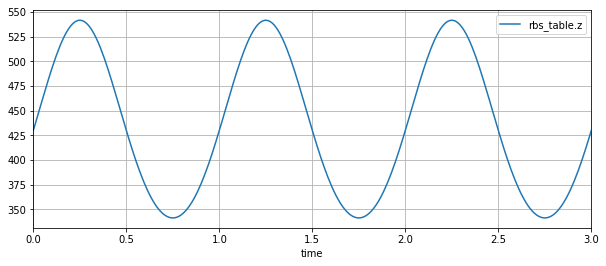

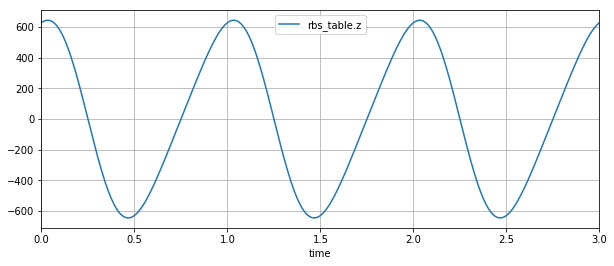

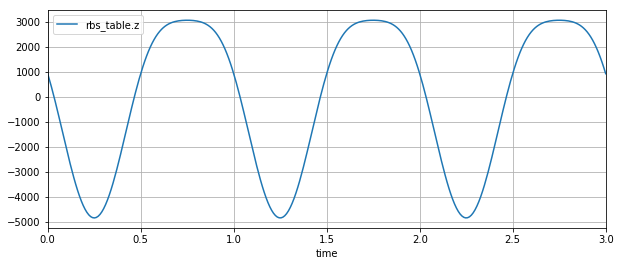

In [37]:
sim1.soln.pos_dataframe.plot(x='time', y='rbs_table.z', grid=True, figsize=(10,4))
sim1.soln.vel_dataframe.plot(x='time', y='rbs_table.z', grid=True, figsize=(10,4))
sim1.soln.acc_dataframe.plot(x='time', y='rbs_table.z', grid=True, figsize=(10,4))

In [35]:
sim1.eval_reactions()


Evaluating System Constraints Reactions:
Progress: [=========================] 100%, (300/300) steps.

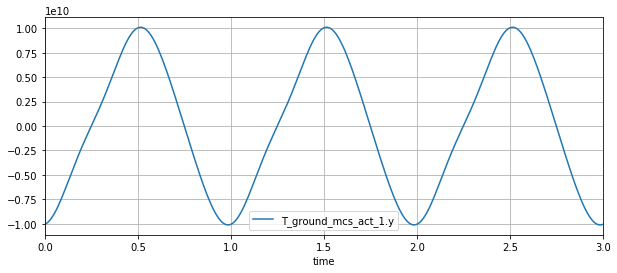

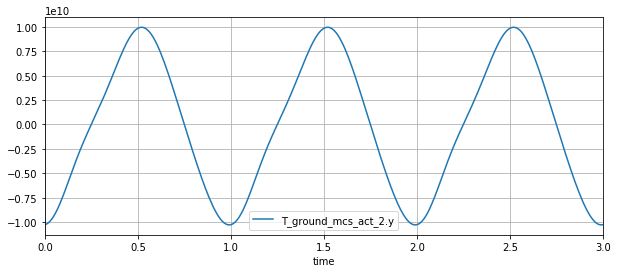

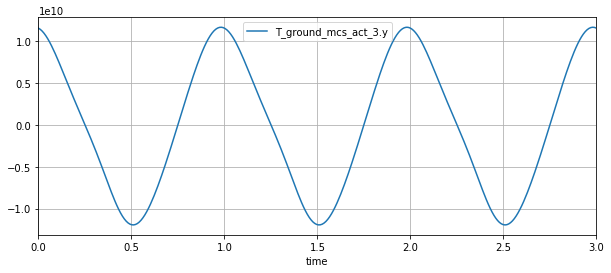

In [36]:
sim1.soln.reactions_dataframe.plot(x='time', y='T_ground_mcs_act_1.y', grid=True, figsize=(10,4))
sim1.soln.reactions_dataframe.plot(x='time', y='T_ground_mcs_act_2.y', grid=True, figsize=(10,4))
sim1.soln.reactions_dataframe.plot(x='time', y='T_ground_mcs_act_3.y', grid=True, figsize=(10,4))